In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import numpy as np

In [2]:
DATA_DIR = "./data"

In [3]:
train_df = pd.read_csv(f"{DATA_DIR}/train.csv")
train_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
dates = train_df.year*100+train_df.week_no
train_df['date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
train_df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,date
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,2019-01-06
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,2019-01-13
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,2019-01-20
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,2019-01-27
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,2019-02-03


In [5]:
len(train_df)

79023

<Axes: >

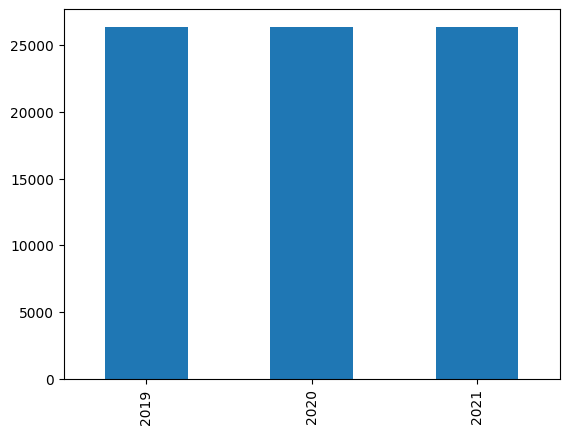

In [6]:
train_df.year.value_counts().plot.bar()

In [7]:
unique_locations = train_df[["latitude", "longitude"]].groupby(["latitude", "longitude"]).size().reset_index().rename(columns={0:'count'})

<Axes: xlabel='latitude', ylabel='longitude'>

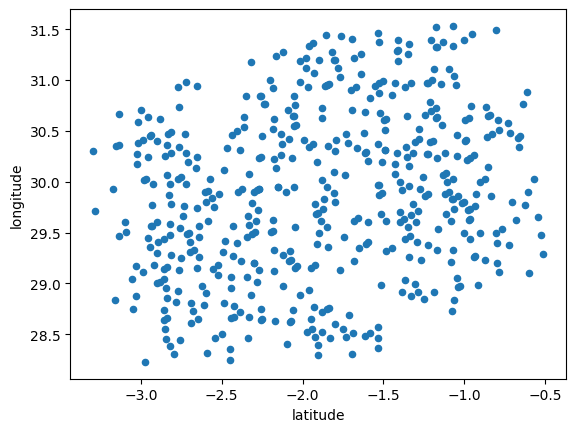

In [8]:
unique_locations.plot.scatter(x="latitude", y="longitude")

In [105]:
unique_locations = unique_locations.sort_values(by=["longitude", "latitude"])

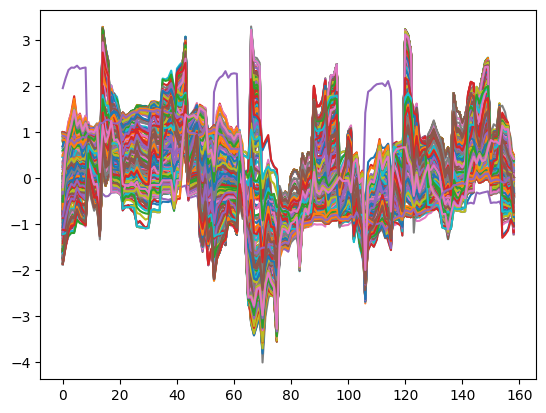

In [106]:
fig, ax = plt.subplots()

emission_dataset = []

for i, location in unique_locations.iterrows():
    emissions = train_df.query(f"latitude == {location.latitude} and longitude == {location.longitude}").reset_index().emission
    emission_dataset.append(emissions.values)
    emissions = (emissions-emissions.mean())/emissions.std()
    emissions.plot()

In [107]:
emission_dataset = np.array(emission_dataset)
emission_dataset_max = emission_dataset.max(axis=1)

emission_dataset = emission_dataset[np.where(emission_dataset_max != emission_dataset_max.min())[0]]

emission_dataset_mean = emission_dataset.mean(axis=1, keepdims=True)
emission_dataset_std = emission_dataset.std(axis=1, keepdims=True)

emission_dataset = (emission_dataset - emission_dataset_mean) / emission_dataset_std

emission_dataset_swapped = emission_dataset[:100].swapaxes(0, 1)
emission_dataset_swapped.shape

(159, 100)

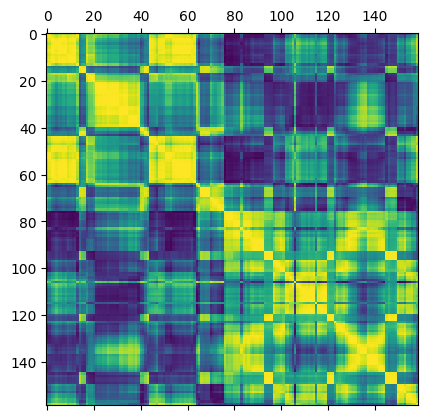

In [108]:
plt.matshow(np.corrcoef(emission_dataset_swapped))

In [15]:
split = int(len(emission_dataset_swapped) * 0.8)

train_emission_ds = emission_dataset_swapped[:split]
test_emission_ds = emission_dataset_swapped[split:]

train_emission_ds.shape, test_emission_ds.shape

((127, 100), (32, 100))

In [17]:
train_series = torch.from_numpy(train_emission_ds.astype(np.float32))
test_series = torch.from_numpy(test_emission_ds.astype(np.float32))

In [67]:
look_back = 80

train_dataset = []
train_labels = []
for i in range(len(train_series)-look_back):
    train_dataset.append(train_series[i:i+look_back])
    train_labels.append(train_series[i+look_back])
train_dataset = torch.stack(train_dataset)
train_labels = torch.stack(train_labels)

In [68]:
train_dataset.shape, train_labels.shape

(torch.Size([47, 80, 100]), torch.Size([47, 100]))

In [69]:
class Net(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super(Net, self).__init__()
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x)
        return x

In [70]:
model = Net(input_size=train_dataset.shape[-1], hidden_size=200, output_size=train_dataset.shape[-1])
loss_function = nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

261700

In [71]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

loss_curve = []

for epoch in range(500):
    loss_total = 0

    for x_train, y_train in zip(train_dataset, train_labels):
        model.zero_grad()

        x_train = x_train
        y_train = torch.as_tensor(y_train).unsqueeze(0)

        predictions = model(x_train)
        loss = loss_function(predictions[-1].unsqueeze(0), y_train)
        loss_total += loss.item()
        loss.backward()
        optimizer.step()

    loss_curve.append(loss_total / len(train_dataset))

    mean_loss = np.mean(loss_curve)
    print(f"Epoch {epoch} - loss: {mean_loss}")


Epoch 0 - loss: 0.6391592333291439
Epoch 1 - loss: 0.5983934064019234
Epoch 2 - loss: 0.5593779695794937
Epoch 3 - loss: 0.5264665046508642
Epoch 4 - loss: 0.4987476135822052
Epoch 5 - loss: 0.4748817553400253
Epoch 6 - loss: 0.4537754486481967
Epoch 7 - loss: 0.4351755253267177
Epoch 8 - loss: 0.4187844685514415
Epoch 9 - loss: 0.4042629589762618
Epoch 10 - loss: 0.3913376933050196
Epoch 11 - loss: 0.37974390276403874
Epoch 12 - loss: 0.3692812874879682
Epoch 13 - loss: 0.35975912528248405
Epoch 14 - loss: 0.3510205214182642
Epoch 15 - loss: 0.34291285603614324
Epoch 16 - loss: 0.3354081370050696
Epoch 17 - loss: 0.32836459937062884
Epoch 18 - loss: 0.3217667363102215
Epoch 19 - loss: 0.31553636115103806
Epoch 20 - loss: 0.3096382050740079
Epoch 21 - loss: 0.3040577285180888
Epoch 22 - loss: 0.29870325749590104
Epoch 23 - loss: 0.29367772373205697
Epoch 24 - loss: 0.2888222533206832
Epoch 25 - loss: 0.28453983729453713
Epoch 26 - loss: 0.28086267316888597
Epoch 27 - loss: 0.2776084743

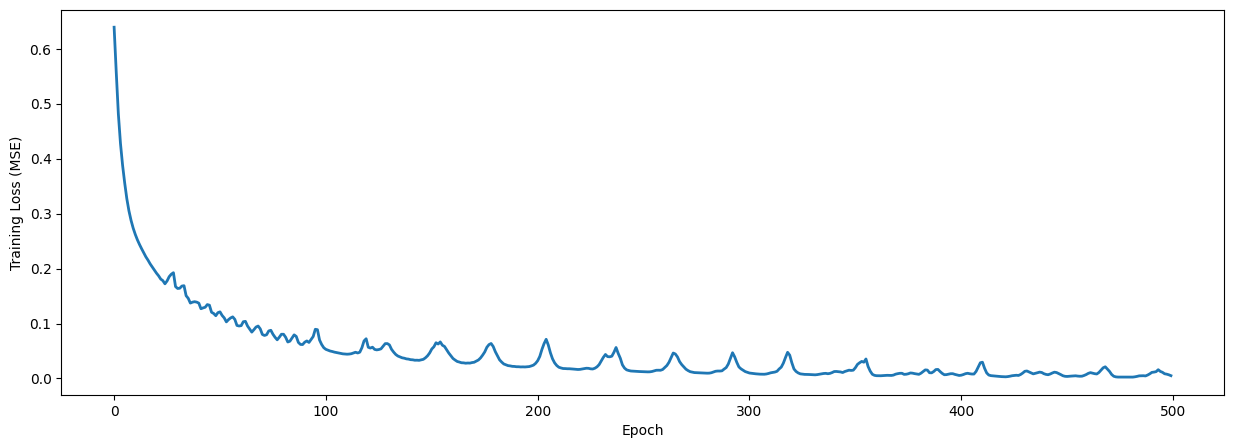

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(loss_curve, lw=2)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss (MSE)")
plt.show()

In [73]:
test_predictions = []

x_test = train_dataset[-1]

for i in range(len(test_emission_ds)):
    with torch.no_grad():
        pred = model(x_test)[-1]
        test_predictions.append(pred)
        x_test = torch.cat((x_test[1:], pred.unsqueeze(0)))

test_predictions = torch.stack(test_predictions)
test_predictions.shape

torch.Size([32, 100])

In [74]:
model.eval()
with torch.no_grad():
    train_predictions = model(train_dataset)

In [75]:
train_series.shape, test_predictions.shape, train_predictions.shape

(torch.Size([127, 100]), torch.Size([32, 100]), torch.Size([47, 80, 100]))

In [76]:
train_series_swapped = train_series.swapaxes(0, 1)
test_predictions_swapped = test_predictions.swapaxes(0, 1)
train_predictions_swapped = train_predictions[:, -1, :].swapaxes(0, 1)
test_emissions_swapped = test_emission_ds.swapaxes(0, 1)
train_series_swapped.shape, test_predictions_swapped.shape, train_predictions_swapped.shape

(torch.Size([100, 127]), torch.Size([100, 32]), torch.Size([100, 47]))

In [77]:
# train_series_swapped *= emission_dataset_std
# train_series_swapped += emission_dataset_mean

In [41]:
# test_predictions_swapped *= emission_dataset_std
# test_predictions_swapped += emission_dataset_mean
# test_predictions_swapped.shape

torch.Size([481, 32])

In [42]:
# train_predictions_swapped *= emission_dataset_std
# train_predictions_swapped += emission_dataset_mean

In [51]:
# test_emissions_swapped *= emission_dataset_std
# test_emissions_swapped += emission_dataset_mean

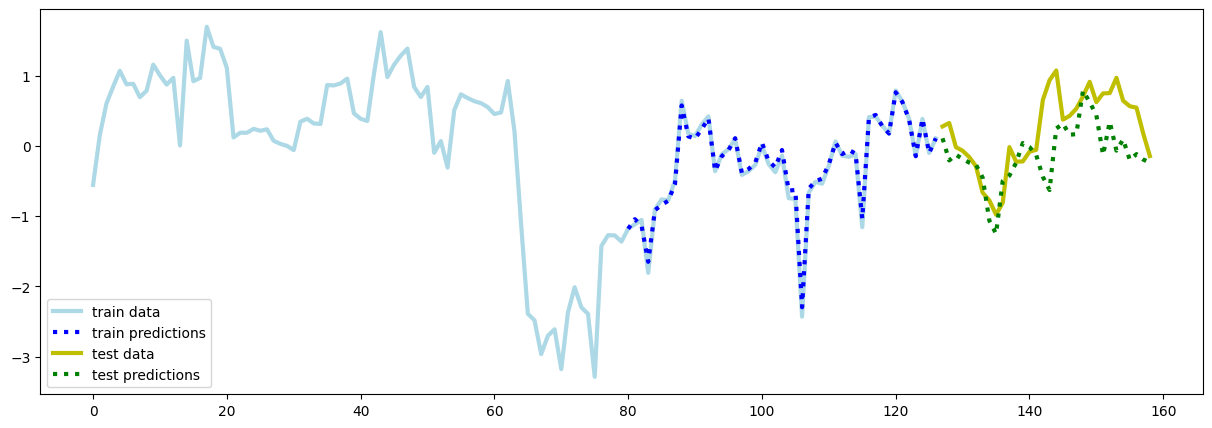

tensor(0.8004, dtype=torch.float64)

In [85]:
country_id = 0

start = len(train_series_swapped[country_id])
end = len(test_predictions_swapped[country_id])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(np.arange(start), train_series_swapped[country_id], lw=3, c='lightblue', label='train data')
ax.plot(np.arange(look_back, start), train_predictions_swapped[country_id], lw=3, c='b',linestyle = ':', label='train predictions')
ax.plot(np.arange(start, start + end), test_emissions_swapped[country_id], lw=3, c='y', label='test data')
ax.plot(np.arange(start, start + end), test_predictions_swapped[country_id], lw=3, c='g',linestyle = ':', label='test predictions')
ax.legend(loc="lower left")
plt.show()
loss_function(test_predictions, torch.from_numpy(test_emission_ds))